In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dff = pd.read_csv("C:/Users/hp/Downloads/Desktop/Jupyter_Files/tips (data for regression problem).csv")

In [55]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
dff.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [59]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [61]:
dff.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff['sex'] = le.fit_transform(dff['sex']) 
dff['smoker'] = le.fit_transform(dff['smoker'])
dff['time'] = le.fit_transform(dff['time'])
dff = pd.get_dummies(dff, columns=['day'], drop_first=True)

In [65]:
dff.head()

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,0,2,False,True,False
1,10.34,1.66,1,0,0,3,False,True,False
2,21.01,3.50,1,0,0,3,False,True,False
3,23.68,3.31,1,0,0,2,False,True,False
4,24.59,3.61,0,0,0,4,False,True,False


In [69]:
X = dff.drop('tip', axis=1).values   
y = dff['tip'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train[:5])  
print(y_train[:5])

[[13.28 1 0 0 2 True False False]
 [24.27 1 1 0 2 True False False]
 [27.28 1 1 0 2 False False False]
 [31.71 1 0 0 4 False True False]
 [15.98 1 0 1 2 False False True]]
[2.72 2.03 4.   4.5  2.03]


#### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred) 

# print("Actual y: ",y_train)
# print("Predicted y: ",y_pred)

r2 = r2_score(y_test, y_pred) 
print(f"Linear Regression - MAE: {mae:.3f}, R²: {r2:.3f}")

Linear Regression - MAE: 0.667, R²: 0.437


#### Ridge Regularization

In [83]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
 
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)  
r2_ridge = r2_score(y_test, y_pred_ridge)  

print(f"Ridge Regression - MAE: {mae_ridge:.3f}, R²: {r2_ridge:.3f}")

Ridge Regression - MAE: 0.667, R²: 0.439


#### Lasso Regularization

In [145]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)  
r2_lasso = r2_score(y_test, y_pred_lasso)   

print(f"Lasso Regression - MAE: {mae_lasso:.3f}, R²: {r2_lasso:.3f}")

Lasso Regression - MAE: 0.626, R²: 0.547


#### Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)  
r2_tree = r2_score(y_test, y_pred_tree)   

print(f"Decision Tree Regression - MAE: {mae_tree:.3f}, R²: {r2_tree:.3f}")

Decision Tree Regression - MAE: 0.830, R²: -0.004


#### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)   
r2_rf = r2_score(y_test, y_pred_rf)   

print(f"Random Forest Regression - MAE: {mae_rf:.3f}, R²: {r2_rf:.3f}")

Random Forest Regression - MAE: 0.758, R²: 0.258


#### Support Vector Regression

In [95]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr) 
r2_svr = r2_score(y_test, y_pred_svr)  

print(f"Support Vector Regression (SVR) - MAE: {mae_svr:.3f}, R²: {r2_svr:.3f}")

Support Vector Regression (SVR) - MAE: 0.568, R²: 0.574


#### KNN

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)   
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)  
r2_knn = r2_score(y_test, y_pred_knn)  

print(f"K-Nearest Neighbors Regression (KNN) - MAE: {mae_knn:.3f}, R²: {r2_knn:.3f}")

K-Nearest Neighbors Regression (KNN) - MAE: 0.719, R²: 0.299


Actionable insights for management based on tipping behavior:
* Key Factors: Identify factors like day of the week, party size, smoking habits, and gender that impact tips, allowing for targeted service strategies.
* Staff Scheduling: Use predictions to optimize staffing during high-tipping periods (e.g., weekends or busy times).
* Personalized Service: Tailor service based on customer demographics (e.g., engage smokers or larger groups more effectively).
* Incentive Programs: Offer tip-based incentives for servers and loyalty programs to encourage higher tips.
* Menu & Pricing: Upsell during peak times and to larger groups to boost bills and tips.
* Staff Training: Focus training on serving larger groups or peak times to increase tips.
* Revenue Optimization: Use tip predictions to allocate resources efficiently and maximize revenue.

#### Scatter Plot

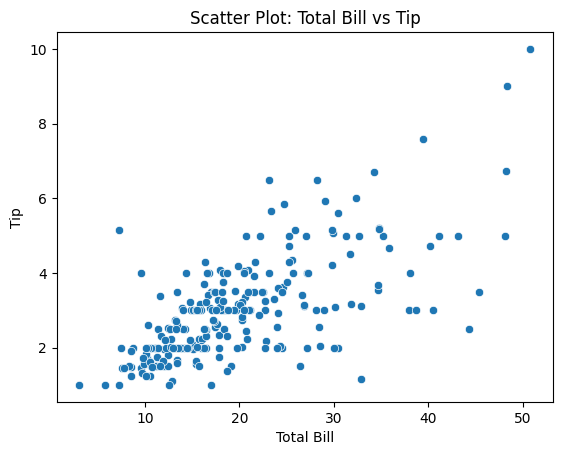

In [103]:
# Scatter plot for total_bill vs tip
sns.scatterplot(x='total_bill', y='tip', data=dff)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

There is a positive relation b/w total bill and tip.

#### Pair Plot

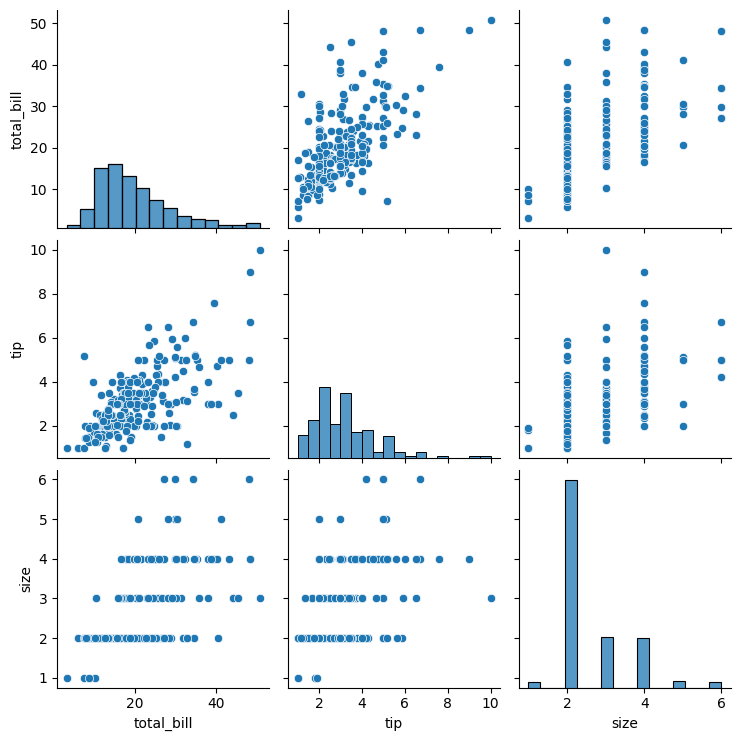

In [112]:
sns.pairplot(dff[['total_bill', 'tip', 'size']])
plt.show()

##### Histogram Distributions:

* Total_bill: The distribution appears to be right-skewed, indicating that most bills are relatively small, with a few larger bills.
* Tip: The distribution of tips is also right-skewed, suggesting that most tips are smaller, with a few larger tips.

##### Scatter Plots:

* Total_bill vs. Tip: There's a positive correlation between the total bill and the tip. As the total bill increases, the tip amount generally also increases.
* Total_bill vs. Size: The relationship between the total bill and the size of the party is less clear. There seems to be some variation, but no strong linear relationship is evident.

#### Heatmap

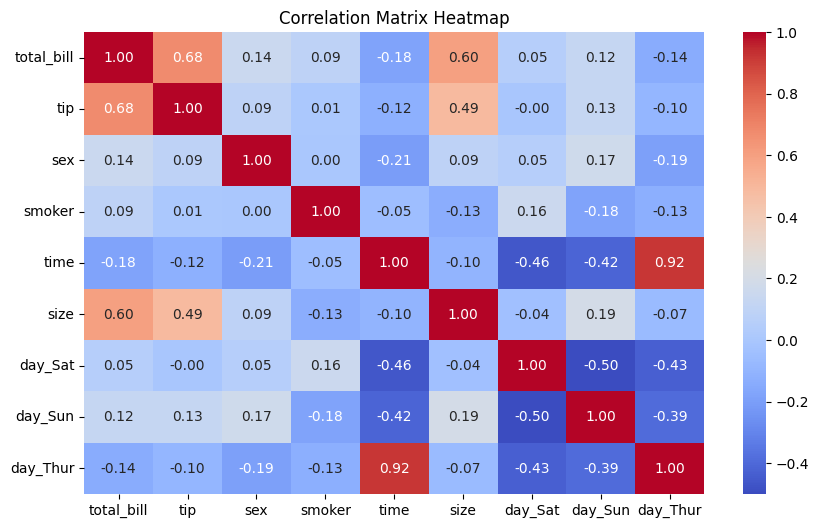

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dff[['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'day_Sat', 'day_Sun', 'day_Thur']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Strong Positive Correlations:
* total_bill and tip: Higher bills tend to have higher tips.
* day_Thur and time: Thursday dinners tend to be later in the evening.
* Moderate Positive Correlations:

* total_bill and size: Larger parties tend to spend more.
* tip and size: Larger parties tend to leave larger tips.
  
##### Negative Correlations:
* time and day_Sat, day_Sun: Later dinners are less likely to be on weekends.
* smoker and tip: Smokers tend to tip less.
  
##### Weak or No Correlations:
Most variables have weak or no correlation with sex.

#### Rainbow Test

In [122]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

model = ols('tip ~ total_bill + size + sex + smoker + time + day_Sat + day_Sun + day_Thur', data=dff).fit()

stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {stat:.3f}")
print(f"Rainbow Test p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The p-value is low, suggesting that a linear model may not be a good fit.")
else:
    print("The p-value is high, suggesting that a linear model may be appropriate.")

Rainbow Test Statistic: 1.197
Rainbow Test p-value: 0.166
The p-value is high, suggesting that a linear model may be appropriate.


#### Residuals Plot

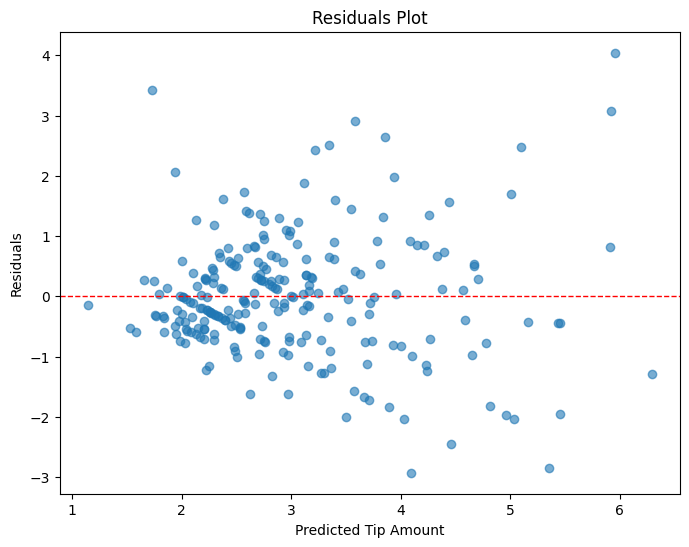

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
X = dff[['total_bill', 'size']]
y = dff['tip']
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict on the data and calculate residuals
y_pred = linear_model.predict(X)
residuals = y - y_pred

# Plot residuals without lowess smoothing
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


* Randomness: The points are scattered randomly around the horizontal line at zero. This indicates that the model's predictions are generally accurate and unbiased.
* No Pattern: There's no clear pattern or trend in the residuals. This suggests that the model's assumptions are valid, and there's no systematic underestimation or overestimation of the tip amounts.

#### Sequential Tip Plot

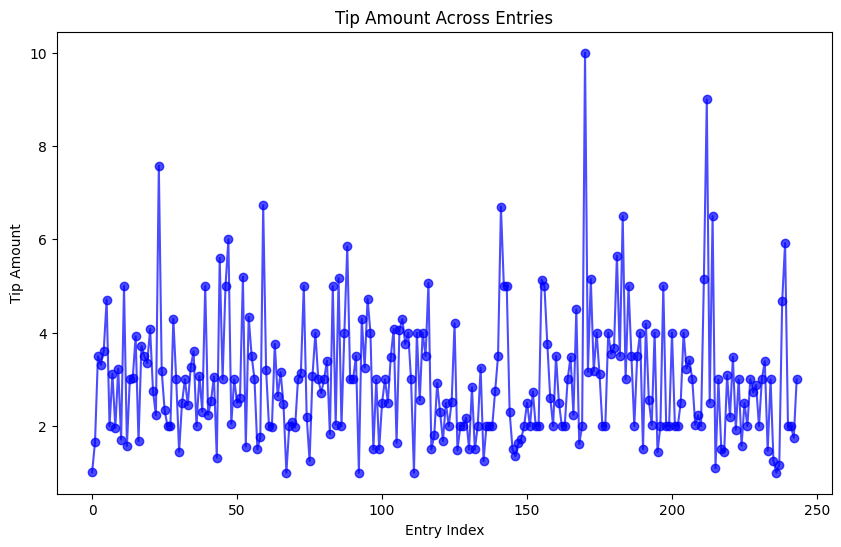

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(dff.index, dff['tip'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title("Tip Amount Across Entries")
plt.xlabel("Entry Index")
plt.ylabel("Tip Amount")
plt.show()

* Variability: The tip amount varies significantly across different entries, ranging from very low to very high tips.
* No clear pattern: There's no obvious trend or pattern in the tip amounts as we move across the entries.
* Potential Outliers: A few entries with exceptionally high tip amounts stand out as potential outliers.

##### Selection of Model
* If a Linear Trend is Present: Use Linear Regression or Ridge/Lasso regression for regularization if there’s overfitting.
* If Non-linear Patterns are Present: Use Decision Tree Regression or Random Forest Regression.
* Complex Boundaries but Continuous Data: Try Support Vector Regression (SVR) or KNN Regression.

Support Vector Regression (SVR) and Lasso Regression have the best performance, as they show relatively high R² values and lower MAE scores, indicating better prediction accuracy and lower error:
* SVR: MAE = 0.568, R² = 0.574
* Lasso Regression: MAE = 0.626, R² = 0.547

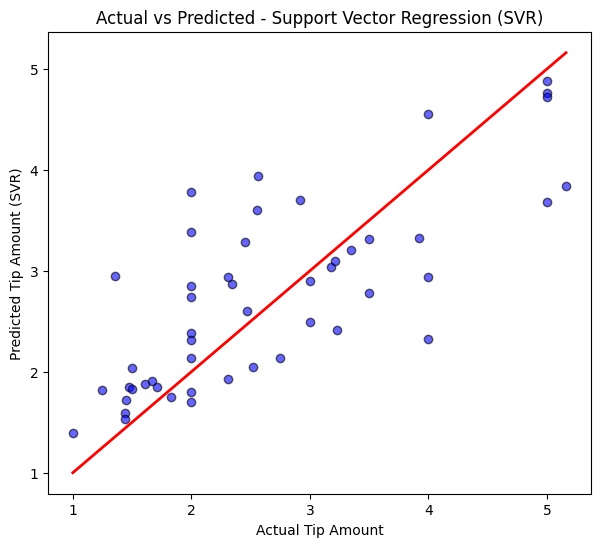

In [152]:
# Actual vs. Predicted for SVR
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount (SVR)")
plt.title("Actual vs Predicted - Support Vector Regression (SVR)")
plt.show()

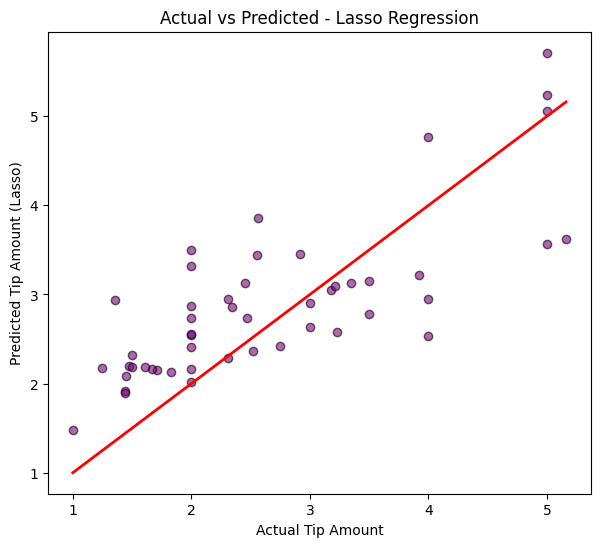

In [154]:
# Actual vs. Predicted for Lasso
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lasso, color='purple', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount (Lasso)")
plt.title("Actual vs Predicted - Lasso Regression")
plt.show()